# Аналитика в авиакомпании

# Введение

В данной работе нам предстоит рассмотерть и изучить информацию о количестве рейсов по моделям самолетов в сентябре 2018 года и среднем количестве рейсов в день в августе 2018 года по городам прилета.

<b> Исходные данные:</b> 2 таблицы. В таблице 1 представлена информация о модели самолёта model и количестве рейсов flights_amount для каждой модели самолетов в сентябре 2018 года. В таблице 2 - города прилёта city и соответствующее им среднедневное количество рейсов flights_amount в августе 2018 года.

<b> Цель исследования:</b> выделить топ-10 городов по количеству рейсов и найти зависимости между всеми имеющимися величинами. 

# Оглавление 
1. [Общая информация о данных](#step1)
2. [Анализ данных](#step2)
3. [Общий вывод](#step35)

# Раздел 1. Общая информация о данных <a name="step1"></a>

Для начала нам пердстоит посмотреть на те данные, с которыми мы будем работать.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
model = pd.read_csv('/datasets/query_1.csv')
city = pd.read_csv('/datasets/query_3.csv')

In [3]:
model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
model.info

<bound method DataFrame.info of                  model  flights_amount
0      Airbus A319-100             607
1      Airbus A321-200             960
2       Boeing 737-300             630
3       Boeing 767-300             600
4       Boeing 777-300             300
5   Bombardier CRJ-200            4446
6   Cessna 208 Caravan            4557
7  Sukhoi SuperJet-100            4185>

In [5]:
model['flights_amount'].sum()

16285

In [6]:
city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [7]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


### Вывод
Мы сами делали выгрузку нужной информации, поэтому данные "чистые":
1. Столбцы таблиц названы адекватно.
2. Типы данных представлены корректно: integer для целочисленного значения числа рейсов по моделям и float для дробного значения средневного числа рейсов.
3. Данные в категориальных столбцах отсортированы по алфавиту.
4. Нет пропущенных значений в данных.

Таким образом, данные готовы к дальнейшему анализу.

В таблице model представлена информация по рейсам 8 моделей самолетов, в таблице city - данные о 101 городе прилета.

# Раздел 2. Анализ данных <a name="step2"></a>

Выделим топ-10 городов по среднедневному количеству рейсов в августе, прилетающих в них.

In [8]:
city_top10 = city.sort_values('average_flights', ascending=False).head(10)

In [9]:
city_top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Ожидаемо, на первом месте с большим отрывом оказалась Москва (всё-таки 3 крупных аэропорта играют роль). В тройку также попали Санкт-Петербург и Новосибирск. Замыкает десятку Ульяновск с более 9 полетами в день.

In [10]:
plt.style.use('ggplot')

Text(0, 0.5, 'Рейсов в день')

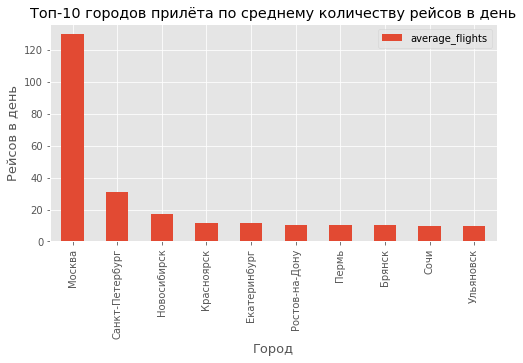

In [11]:
ax_top10 = city_top10.plot(x='city', y='average_flights', kind='bar', figsize=(8,4), title='Топ-10 городов прилёта по среднему количеству рейсов в день')
ax_top10.set_xlabel('Город', fontsize=13)
ax_top10.set_ylabel('Рейсов в день', fontsize=13)

Чтобы посмотреть, как распределено среднедневное число рейсов по всем городам прилета, построим гистограмму с числом корзин, равным числу городов. (График в виде столбчатой диагараммы будет не очень показателен, т.к. в нашем списке довольно много городов - 101).

Text(0.5, 1.0, 'Распределение городов прилёта по среднему количеству рейсов в день')

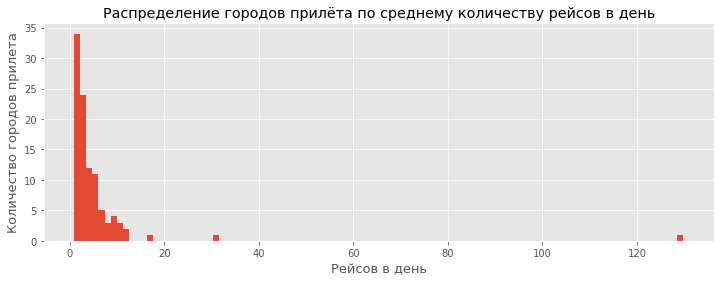

In [12]:
ax_city = city['average_flights'].plot(kind='hist', figsize=(12,4), bins=101) 
ax_city.set_xlabel('Рейсов в день', fontsize=13)
ax_city.set_ylabel('Количество городов прилета', fontsize=13)
ax_city.set_title('Распределение городов прилёта по среднему количеству рейсов в день')

Наконец, посмотрим, сколько было рейсов в сентябре по моделям самолетов.

Text(0, 0.5, 'Рейсов')

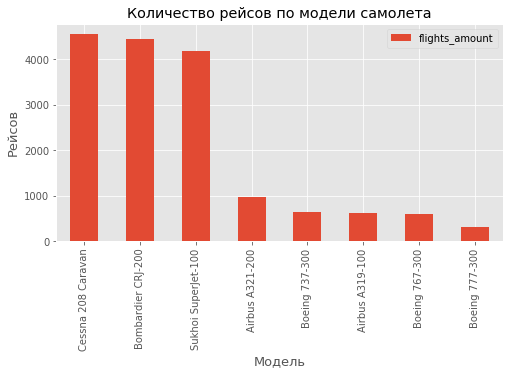

In [13]:
ax_model = model.sort_values('flights_amount', ascending=False).plot(x='model', y='flights_amount', kind='bar', figsize=(8,4), title='Количество рейсов по модели самолета')
ax_model.set_xlabel('Модель', fontsize=13)
ax_model.set_ylabel('Рейсов', fontsize=13)

### Вывод
Мы построили необходимые графики и обнаружили следующее.
1. Самый "популярный" город России по числу прилетов - ожидаемо, Москва. Каждый день (по данным за август 2018 года) здесь приземляется 130 самолетов. Всего городов в выборке 101, значит, очевидно, из каких-то городов прилетает в среднем от двух рейсов и более.
2. На втором месте по среднему количеству прилетающих самолетов в день - Санкт-Петербург. Причем отставание от лидера существенное - почти в 4 раза. Замыкает тройку городов с самым большим числом принимающих в день рейсов Новосибирск. Города с 4 по 10 места в рейтинге имеют схожее число рейсов в день - от 9 до 11.
3. Гистограмма распределения всех городов прилёта по среднему количеству рейсов в день показывает, что за пределами десятки аэропорты в России не очень "активны": наибольшее число из них (34 штуки) принимает от 1 до 2 рейсов в день, еще 24 - менее 3.
4. График изменения числа рейсов в зависимости от модели самолета показывает популярность в России региональных самолетов: вероятно, почти все рейсы, которые выполняются не между крупнейшими городами, проходят на бортах с небольшой вместимостью.


# Общий вывод <a name="step3"></a>

Построенные нами графики показывают неравномерность географии внутрироссийских рейсов. Вполне ожидаемо, что Москва со своими тремя большими транспортными хабами принимает рекордное количество рейсов - в среднем 130 в день. Но жители других городов часто не имеют возможности добраться напрямую до нужного им пункта: более половины городов принимают в среднем от 1 до 3 рейсов в день (скорее всего, из ближайших регионов или из столицы). И это в августе - самом "активном" отпускном месяце в году.

Интересно, что более 3/4 рейсов выполняется на "маловместительных" региональных моделях самолетов Cessna 208 Caravan, Bombardier, Sukhoi SuperJet-100. Кажется маловероятным, что спрос на перелеты между соседними регионами настолько низкий, что хватает небольших самолетов. Скорее всего, на короткие расстояния не выгодно выпускать большие самолеты, и неудовлетворенный спрос пассажиры переносят на другие виды транспорта, доступные для небольших расстояний: автомобили, автобусы, поезда. Популярные модели боингов и аэробусов в месяц осуществляют от 300 до 960 рейсов.
